#### **Bước 1. Phân tích các phương thức có trong chương trình**
**Bài toán:** Tôi đã tìm thấy lá cờ, nhưng anh trai tôi đã viết một chương trình để mã hóa tất cả các tệp văn bản của anh ấy. Anh ấy cũng có một hướng dẫn học bài kiểm tra chính tả, nhưng tôi không biết điều đó có hữu ích không?

**Hint:** 
- ...


##### ***1.1. Phân tích các đoạn trong chương trình***


In [ ]:
import random
import os

- Tạo danh sách tất cả các tệp có phần mở rộng `.txt` nằm trong thư mục hiện tại và tất cả các thư mục con của nó
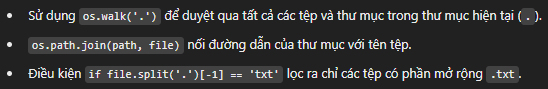

In [ ]:
files = [
    os.path.join(path, file)
    for path, dirs, files in os.walk('.')
    for file in files
    if file.split('.')[-1] == 'txt'
]

- Tạo ra bảng mã hóa tương ứng chuyển đổi từng ký tự (giống như mật mã thay thế)

In [ ]:
alphabet = list('abcdefghijklmnopqrstuvwxyz')
random.shuffle(shuffled := alphabet[:]) # Gán giá trị ngẫu nhiên cho biến shuffled
dictionary = dict(zip(alphabet, shuffled))

- Cuối cùng, thực hiện mã hóa thay thế trên tất cả các file

In [ ]:
for filename in files:
    text = open(filename, 'r').read()
    encrypted = ''.join([
        dictionary[c]
        if c in dictionary else c
        for c in text
    ])
    open(filename, 'w').write(encrypted)

#### **Bước 2. Phân tích**
- Như đã trình bày, bài toán này chỉ là một bài toán thực hiện mã hóa thay thế. Do đó, bước đầu tiên, ta sẽ tính toán các giá trị thường lặp lại. Ta sẽ dựa trên file `study-guide.txt`

- Tiếp theo, ta tính toán tầng suất các chữ thường lặp lại nhiều nhất trong bài toán theo cụm 2 ký tự, 3 ký tự.

- Cuối cùng, ta dựa vào đó để đoán các ký tự thay thế.


In [1]:
import string

# Thực hiện:
frequency_En = ['e', 't', 'a', 'o', 'i', 'n', 's', 'h', 'r', 'd', 'l', 'c', 'u', 'm', 'w', 'f', 'g', 'y', 'p', 'b', 'v', 'k', 'j', 'x', 'q', 'z']

cipher = ""
with open('study-guide.txt', 'r') as file:
    lines = file.readlines()

for line in lines:
    cipher += line.strip()
# print(cipher)

def frequency_characters(text):
    char_count = {}
    for char in text:
        if char.isalpha(): 
            char = char.lower()  
            if char in char_count:
                char_count[char] += 1
            else:
                char_count[char] = 1
    
    return char_count

def most_frequent_characters(fre_dict_char):
    # Sắp xếp các ký tự theo giá trị xuất hiện nhiều nhất (giảm dần)
    sorted_characters = sorted(fre_dict_char.keys(), key=lambda char: fre_dict_char[char], reverse=True)
    sorted_frequencies = [fre_dict_char[char] for char in sorted_characters]
    
    return sorted_characters, sorted_frequencies

most_fre_chars, num_fre_chars = most_frequent_characters(frequency_characters(cipher))
print(frequency_En)
print(most_fre_chars)

['e', 't', 'a', 'o', 'i', 'n', 's', 'h', 'r', 'd', 'l', 'c', 'u', 'm', 'w', 'f', 'g', 'y', 'p', 'b', 'v', 'k', 'j', 'x', 'q', 'z']
['r', 'w', 'x', 't', 'i', 'a', 'c', 'v', 'l', 'n', 'o', 'b', 'm', 's', 'f', 'd', 'q', 'u', 'y', 'p', 'g', 'e', 'k', 'z', 'j', 'h']


- Suy ra có thể `e -> r`

Bây giờ, ta tính tần suất 2 chữ cái và 3 chữ cái

In [20]:
from collections import Counter 

most_3_letter_EN = [
    "the", "and", "for", "you", "not", "are", "all", "new", "was", 
    "can", "has", "but", "our", "one", "may", "out", "use", "any", 
    "see", "his"
]

most_2_letter_EN = [
    "of", "to", "in", "it", "is", "be", "as", "at", "on", 
    "by", "he", "or", "an", "if", "no", "us", "we", "do", 
    "up", "go", "me", "my"
]

most_4_letter_EN = [
    "that", "with", "have", "this", "from", "they", "will", "your", 
    "been", "good", "more", "them", "than", "some", "time", "when", 
    "each", "many", "make", "very", "into", "just", "like", "know"
]

# Định nghĩa một phương thức tính tần suất 2gram, 3gram:
def ngram_frequency(text_lst, n=2):
    """
    Đọc văn bản và tính số lượng k-gram (chuỗi gồm k ký tự liên tiếp).
    
    Parameters:
    text_lst (list): Danh sách chuỗi văn bản cần phân tích.
    k (int): Độ dài của mỗi k-gram.
    
    Returns:
    Counter: Tần suất xuất hiện của các k-gram.
    """
    overall_kgram_freq = Counter()  # tạo Counter để lưu tần suất
    
    # Kiểm tra danh sách đầu vào phải là list
    assert type(text_lst) == list
    
    # Thực hiện phân tách từng line:
    for line in text_lst:
        line = line.lower()
        letters = [char for char in line if char.isalpha()]
        kgrams = [''.join(letters[i:i+n]) for i in range(len(letters) - n + 1)]
        
        # Cập nhật tần suất k-gram
        overall_kgram_freq.update(kgrams)
    
    return overall_kgram_freq

gram_2 = ngram_frequency(lines, 2)
gram_3 = ngram_frequency(lines, 3)
gram_4 = ngram_frequency(lines, 4)

most_2gram = [word for word, _ in gram_2.most_common(20)]
most_3gram = [word for word, _ in gram_3.most_common(20)]
most_4gram = [word for word, _ in gram_4.most_common(20)]

print(most_2gram)
print(most_2_letter_EN)
print()

print(most_3gram)
print(most_3_letter_EN)
print()

print(most_4gram)
print(most_4_letter_EN)

['rc', 'wt', 'vw', 'it', 'ra', 'vr', 'xv', 'xl', 'cr', 'rt', 'xt', 'wn', 'wa', 'cw', 'cx', 'av', 'lw', 'tr', 'lr', 'ci']
['of', 'to', 'in', 'it', 'is', 'be', 'as', 'at', 'on', 'by', 'he', 'or', 'an', 'if', 'no', 'us', 'we', 'do', 'up', 'go', 'me', 'my']

['wtd', 'xvw', 'raa', 'wit', 'vrc', 'tra', 'vwi', 'rtv', 'xvr', 'ioa', 'vwn', 'wnx', 'wav', 'nxl', 'tit', 'ulr', 'brc', 'xtv', 'xll', 'rcw']
['the', 'and', 'for', 'you', 'not', 'are', 'all', 'new', 'was', 'can', 'has', 'but', 'our', 'one', 'may', 'out', 'use', 'any', 'see', 'his']

['vwit', 'traa', 'xvwi', 'wnxl', 'xulr', 'xllq', 'iprc', 'vwtd', 'vwpr', 'tvrc', 'srtv', 'rtra', 'ilid', 'nxll', 'avwn', 'wtvr', 'xvrm', 'xtvw', 'lwtd', 'vwnx']
['that', 'with', 'have', 'this', 'from', 'they', 'will', 'your', 'been', 'good', 'more', 'them', 'than', 'some', 'time', 'when', 'each', 'many', 'make', 'very', 'into', 'just', 'like', 'know']


- Nhìn vào đây ta vẫn chưa đoán được cụ thể. Thử tìm kiếm các 2gram, 3gram đầu dòng để đoán:

In [23]:
def ngram_first_frequency(text_lst, n=2):
    """
    Đọc văn bản và tính số lượng k-gram word đầu tiên mỗi dòng.
    
    Parameters:
    text_lst (list): Danh sách chuỗi văn bản cần phân tích.
    k (int): Độ dài của mỗi k-gram.
    
    Returns:
    Counter: Tần suất xuất hiện của các k-gram.
    """
    # Kiểm tra danh sách đầu vào phải là list
    assert type(text_lst) == list
    
    # Thực hiện phân tách từng line:
    kfirst_gram = [line[:n] for line in text_lst if n <= len(line)]
    return Counter(kfirst_gram)

# 1 First gram
most_1first_gram = [word for word, _ in ngram_first_frequency(lines, 1).most_common(20)]

print(most_1first_gram)

# 2 First gram
most_2first_gram = [word for word, _ in ngram_first_frequency(lines, 2).most_common(20)]

print(most_2first_gram)

# 3 First gram
most_3first_gram = [word for word, _ in ngram_first_frequency(lines, 3).most_common(20)]

print(most_3first_gram)

# 4 First gram
most_4first_gram = [word for word, _ in ngram_first_frequency(lines, 4).most_common(20)]

print(most_4first_gram)

# 5 First gram
most_5first_gram = [word for word, _ in ngram_first_frequency(lines, 5).most_common(20)]

print(most_5first_gram)

['a', 'b', 'n', 'o', 'x', 's', 'm', 'v', 'c', 'u', 't', 'w', 'r', 'f', 'i', 'y', 'd', 'l', 'e', 'p']
['ot', 'ni', 'bc', 'cr', 'ti', 'wt', 'ao', 'mr', 'mw', 'nx', 'bx', 'xt', 'vc', 'ip', 'nf', 'av', 'ar', 'br', 'sx', 'sw']
['tit', 'bcr', 'ipr', 'bci', 'nit', 'mwa', 'wtv', 'aou', 'otm', 'xtv', 'ota', 'aob', 'otn', 'brc', 'swa', 'fqb', 'bxc', 'ars', 'iov', 'vcx']
['iprc', 'wtvr', 'otmr', 'xtvw', 'aobr', 'arsw', 'otni', 'bilq', 'titn', 'bxcx', 'baro', 'otcr', 'fqbr', 'vcxt', 'swnc', 'tita', 'brcw', 'siti', 'titb', 'bcrn']
['wtvrc', 'aobrc', 'otmrc', 'barom', 'fqbrc', 'vcxta', 'swnci', 'niotv', 'titni', 'iprca', 'fqmci', 'otnit', 'bfivi', 'rlrnv', 'solvw', 'titcr', 'frvrc', 'bcrni', 'iprcn', 'titmr']


##### ***2.2. Solution***
Làm theo cách thông thường ta không thể làm được, ta có thể sử dụng trang web: https://www.dcode.fr/monoalphabetic-substitution, sau đó nhờ nó giải mã tự động là được

Ngoài ra, tham khảo công cụ trong Github: https://github.com/Dvd848/CTFs/blob/master/2021_picoCTF_redpwn/spelling-quiz.md

In [26]:
flag_enc  = "brcfxba_vfr_mid_hosbrm_iprc_exa_hoav_vwcrm"
flag_form = ""

# Ta có mảng thay thế một số chữ:
original_chars = "sprgwhkjozxldcuvyemnbtiafq"
encrypts_chars = "abcdefghijklmnopqrstuvwxyz"
char_mapping = {encrypts_chars[i]: original_chars[i] for i in range(len(original_chars)) if encrypts_chars[i] != '*'}
print(char_mapping)

def decrypt_message(cipher, char_map):
    res = []
    for char in cipher:
        if char in char_mapping:
            res.append(char_mapping[char])  # Thay thế ký tự
        elif char.isupper():  # Nếu ký tự là chữ hoa
            if char.lower() not in char_mapping:
                res.append('*')
            else:
                res.append(char_mapping[char.lower()].upper())
        elif char.isalpha():
            res.append('*')
        else:
            res.append(char)  # Giữ nguyên ký tự không phải chữ cái

    return ''.join(res)

print(decrypt_message(flag_enc, char_mapping))

{'a': 's', 'b': 'p', 'c': 'r', 'd': 'g', 'e': 'w', 'f': 'h', 'g': 'k', 'h': 'j', 'i': 'o', 'j': 'z', 'k': 'x', 'l': 'l', 'm': 'd', 'n': 'c', 'o': 'u', 'p': 'v', 'q': 'y', 'r': 'e', 's': 'm', 't': 'n', 'u': 'b', 'v': 't', 'w': 'i', 'x': 'a', 'y': 'f', 'z': 'q'}
perhaps_the_dog_jumped_over_was_just_tired
